In [6]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
import re
import json

import sys
sys.path.insert(0, '../../')
import util.metrics as metrics
from util.metrics import StreamMetrics, StreamMetricsList
import util.misc as misc

ROOT_DIRECTORY = "../../"
BASE_DIRECTORY = f"{ROOT_DIRECTORY}/results/inter-zone-single-stream/packet-size/"
SECURE_DIRECTORY = f"{BASE_DIRECTORY}/secure/"
INSECURE_DIRECTORY = f"{BASE_DIRECTORY}/insecure/"


def get_packet_sizes():
    # Assumes the sizes are the same between secure, insecure 
    # directories!
    # Directory names are of the form 'size-128', and so on.
    directories = os.listdir(SECURE_DIRECTORY)
    return sorted(
        [int(re.search(r"size-([0-9]+)", directory)[1]) 
         for directory in directories]
    )


packet_sizes = get_packet_sizes()

secure_directories = [f"{SECURE_DIRECTORY}/size-{packet_size}/"
                      for packet_size in packet_sizes]

insecure_directories = [f"{INSECURE_DIRECTORY}/size-{packet_size}/"
                        for packet_size in packet_sizes]

secure_datas = StreamMetricsList([StreamMetrics(directory, skip=10)
                                  for directory in secure_directories])

insecure_datas = StreamMetricsList([StreamMetrics(directory, skip=10)
                                    for directory in insecure_directories])

print(f"PACKET SIZES:\t{packet_sizes}")

print(f"SECURE LATENCIES:\t{secure_datas.mean_latency()}")
print(f"INSECURE LATENCIES:\t{insecure_datas.mean_latency()}")

print(f"SECURE THROUGHPUTS:\t{secure_datas.mean_throughput()}")
print(f"INSECURE THROUGHPUTS:\t{insecure_datas.mean_throughput()}")

print(f"SECURE JITTERS:\t{secure_datas.mean_jitter()}")
print(f"INSECURE JITTERS:\t{insecure_datas.mean_jitter()}")

print(f"SECURE DROP RATE:\t{secure_datas.drop_rate()}")
print(f"INSECURE DROP RATE:\t{insecure_datas.drop_rate()}")




PACKET SIZES:	[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450]
SECURE LATENCIES:	[3.90745508e-05 5.31272837e-05 6.69407033e-05 8.07707098e-05
 9.44582734e-05 1.08383465e-04 1.22348939e-04 1.36315004e-04
 1.50279197e-04 1.64245755e-04 1.78210770e-04 1.92174930e-04
 2.06144019e-04 2.20109098e-04 2.34075099e-04 2.48038009e-04
 2.62004502e-04 2.75966395e-04 2.89937258e-04 3.03899511e-04
 3.17872484e-04 3.31837497e-04 3.45803959e-04 3.59767326e-04
 3.73742847e-04 3.87707166e-04 4.01653592e-04 4.15626196e-04
 4.29600292e-04]
INSECURE LATENCIES:	[1.93968515e-05 3.02591551e-05 4.06911430e-05 5.06930475e-05
 6.02665683e-05 6.94075340e-05 7.88202542e-05 8.83527252e-05
 9.77358188e-05 1.06983252e-04 1.16082762e-04 1.25037040e-04
 1.34230952e-04 1.43931889e-04 1.53635099e-04 1.63330682e-04
 1.73035107e-04 1.82728181e-04 1.92443391e-04 2.02137353e-04
 2.11857769e-04 2.21558543e-04 2.31262890e-0

<Figure size 2560x1920 with 0 Axes>

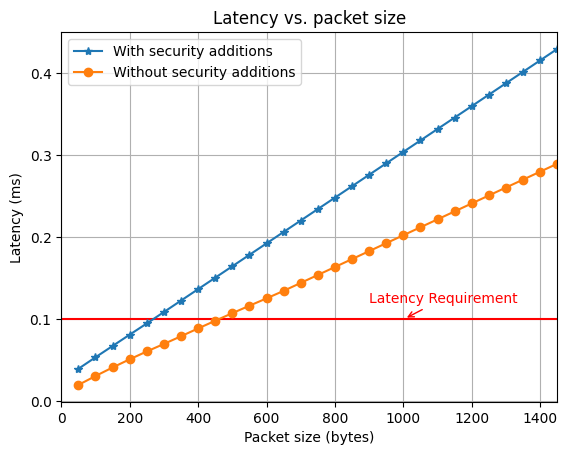

In [7]:
plt.figure(dpi=400)
fig, ax = plt.subplots()

ax.axhline(0.1, color='red')
ax.plot(packet_sizes, secure_datas.mean_latency() * 1000, '*-', label="With security additions")
ax.plot(packet_sizes, insecure_datas.mean_latency() * 1000, 'o-', label="Without security additions")
ax.annotate("Latency Requirement", xy=(1003, 0.10), xytext=(900, 0.12),
             color='red',
             arrowprops=dict(arrowstyle='->', color='red'))
ax.set_xlabel("Packet size (bytes)")
ax.set_ylabel("Latency (ms)")
ax.set_title("Latency vs. packet size")
ax.set_xbound(0, max(packet_sizes))
ax.grid()
ax.legend()
plt.show()

fig.savefig(f"{BASE_DIRECTORY}/latency.png")

<Figure size 2560x1920 with 0 Axes>

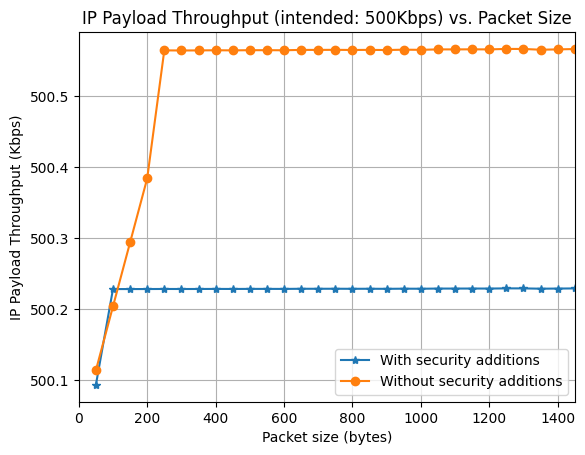

In [8]:
plt.figure(dpi=400)
fig, ax = plt.subplots()

ax.plot(packet_sizes, secure_datas.mean_throughput() / 1000 * 8, '*-', label="With security additions")
ax.plot(packet_sizes, insecure_datas.mean_throughput() / 1000 * 8, 'o-', label="Without security additions")
ax.set_xlabel("Packet size (bytes)")
ax.set_ylabel("IP Payload Throughput (Kbps)")
ax.set_title("IP Payload Throughput (intended: 500Kbps) vs. Packet Size")
ax.set_xbound(0, max(packet_sizes))
ax.grid()
ax.legend()
plt.show()

fig.savefig(f"{BASE_DIRECTORY}/throughput.png")

<Figure size 2560x1920 with 0 Axes>

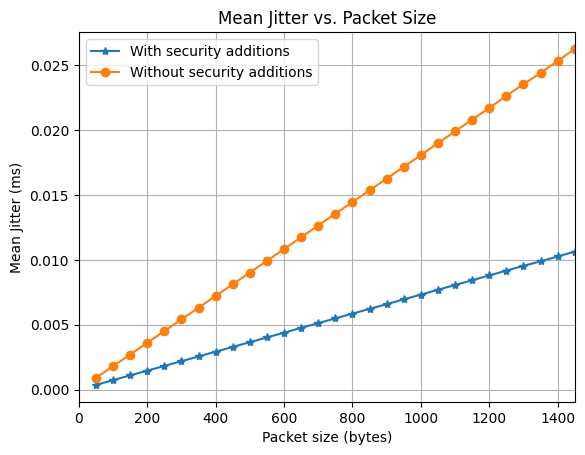

In [9]:
plt.figure(dpi=400)
fig, ax = plt.subplots()

ax.plot(packet_sizes, secure_datas.mean_jitter() * 1000, '*-', label="With security additions")
ax.plot(packet_sizes, insecure_datas.mean_jitter() * 1000, 'o-', label="Without security additions")
ax.set_xlabel("Packet size (bytes)")
ax.set_ylabel("Mean Jitter (ms)")
ax.set_title("Mean Jitter vs. Packet Size")
ax.set_xbound(0, max(packet_sizes))
ax.grid()
ax.legend()
plt.show()

fig.savefig(f"{BASE_DIRECTORY}/jitter.png")

<Figure size 2560x1920 with 0 Axes>

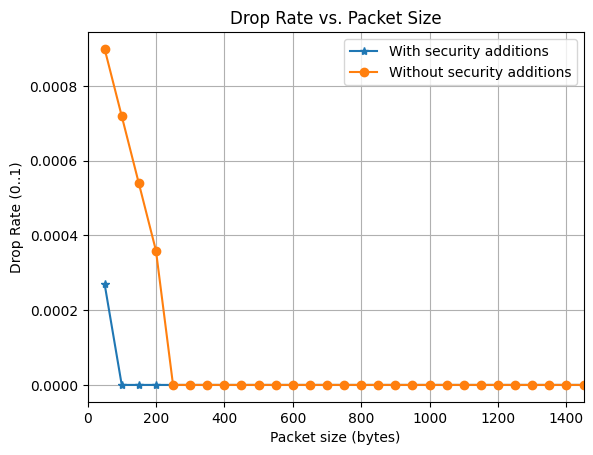

In [10]:

plt.figure(dpi=400)
fig, ax = plt.subplots()

ax.plot(packet_sizes, secure_datas.drop_rate(), '*-', label="With security additions")
ax.plot(packet_sizes, insecure_datas.drop_rate(), 'o-', label="Without security additions")
ax.set_xlabel("Packet size (bytes)")
ax.set_ylabel("Drop Rate (0..1)")
ax.set_title("Drop Rate vs. Packet Size")
ax.set_xbound(0, max(packet_sizes))
ax.grid()
ax.legend()
plt.show()

fig.savefig(f"{BASE_DIRECTORY}/drop_rate.png")